<a href="https://colab.research.google.com/github/kareemrasheed89/RasheedRepository/blob/master/Google_BigQuery_With_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **BIGWITH SQLQUERY DATASET
 
Basics of Accessing and examining bigquery dataset.....
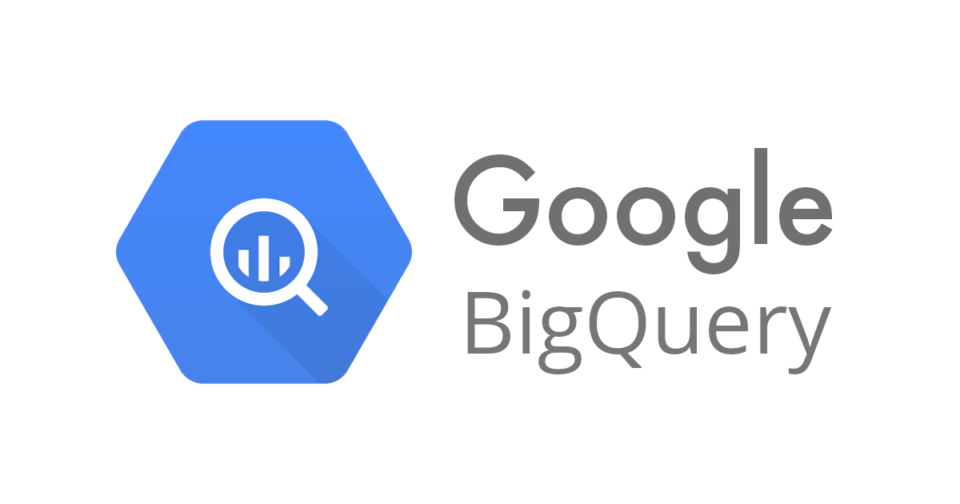


In [ ]:
"""The first thing to do is to import the useful library to access the 
  google bigquery engine"""
from google.cloud import bigquery
# Imports the Google Cloud client library
from google.cloud import storage
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/neural-truth-234412-48fed89d839d.json"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
client=bigquery.Client()
"""We will use kaggle's public dataset BigQuery Integration. 
In BigQuery, each dataset is contained in a corresponding project, 
because for every activity on google cloud console, you must first create a project."""

#Construct a reference to the dataset
dataset_ref=client.dataset("hacker_news", project="bigquery-public-data")

#Now we just created a reference link to the data named 'hacker_news

#Also we need to use client API .GET_dataset
dataset=client.get_dataset(dataset_ref)

In [ ]:
#We then need to list the tables in the "hacker news" dataset file
tables=list(client.list_tables(dataset))
for table in tables:
  print(table.table_id)
  

comments
full
full_201510
stories


In [ ]:
table_ref=dataset_ref.table("full")
table=client.get_table(table_ref)
print(table)

Table(TableReference(DatasetReference('bigquery-public-data', 'hacker_news'), 'full'))


In [ ]:
table.schema

[SchemaField('title', 'STRING', 'NULLABLE', 'Story title', ()),
 SchemaField('url', 'STRING', 'NULLABLE', 'Story url', ()),
 SchemaField('text', 'STRING', 'NULLABLE', 'Story or comment text', ()),
 SchemaField('dead', 'BOOLEAN', 'NULLABLE', 'Is dead?', ()),
 SchemaField('by', 'STRING', 'NULLABLE', "The username of the item's author.", ()),
 SchemaField('score', 'INTEGER', 'NULLABLE', 'Story score', ()),
 SchemaField('time', 'INTEGER', 'NULLABLE', 'Unix time', ()),
 SchemaField('timestamp', 'TIMESTAMP', 'NULLABLE', 'Timestamp for the unix time', ()),
 SchemaField('type', 'STRING', 'NULLABLE', 'Type of details (comment, comment_ranking, poll, story, job, pollopt)', ()),
 SchemaField('id', 'INTEGER', 'NULLABLE', "The item's unique id.", ()),
 SchemaField('parent', 'INTEGER', 'NULLABLE', 'Parent comment ID', ()),
 SchemaField('descendants', 'INTEGER', 'NULLABLE', 'Number of story or poll descendants', ()),
 SchemaField('ranking', 'INTEGER', 'NULLABLE', 'Comment ranking', ()),
 SchemaField(

In [ ]:
client.list_rows(table, max_results=5).to_dataframe()

,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted
0,None,None,I already have “USB drives I didn’t buy” on th...,None,CaliforniaKarl,None,1565574700,2019-08-12 01:51:40+00:00,comment,20671823,20671757,None,None,None
1,None,None,How so?<p>People disagree to the degree killin...,None,Retric,None,1514991211,2018-01-03 14:53:31+00:00,comment,16061405,16061149,None,None,None
2,None,None,Cool idea and nice app,None,nick_mihaiu,None,1413985633,2014-10-22 13:47:13+00:00,comment,8492649,8492582,None,None,None
3,None,None,"While this is a good best practice, most curre...",None,KenoFischer,None,1567546524,2019-09-03 21:35:24+00:00,comment,20871433,20871287,None,None,None
4,None,None,This whole toxins thing is a load of crap.<p><...,None,auxym,None,1500819245,2017-07-23 14:14:05+00:00,comment,14832333,14832139,None,None,None


In [ ]:
#Scripting the Query to explore
QUERY="""SELECT score, title
        FROM `bigquery-public-data.hacker_news.full`
        WHERE type ="job" LIMIT 1000000
        """


In [ ]:
#Create a QueryJobConfig object to estimate size of query without running it
dry_run_config=bigquery.QueryJobConfig(dry_run=True)
dry_run_query_job=client.query(QUERY, job_config=dry_run_config)
print("This Query willl process {} bytes.".format(dry_run_query_job.total_bytes_processed))

This Query willl process 436038630 bytes.


In [ ]:
##Seting a safe configuration for querying dataset from BigQuery Engine
ONE_GB=1000*1000*1000
safe_config=bigquery.QueryJobConfig(maximum_bytes_billed=ONE_GB)
safe_query_job=client.query(QUERY, job_config=safe_config)
data=safe_query_job.to_dataframe()

In [ ]:
data      #query the SQL columns

,score,title
0,8.0,Justin.tv - Web Engineer
1,4.0,Airbnb seeks UI designer
2,5.0,CarWoo! hiring developers who love disrupting ...
3,2.0,BackType — Software Engineer
4,52.0,[Boston] Cloudant Looking for Erlang/OTP Hacker
...,...,...
13368,3.0,Frontend Engineer - Mixpanel Analytics [SF]
13369,3.0,Airbnb Hiring Front-end Engineer
13370,3.0,Mertado (venture funded) is hiring web engineers
13371,3.0,Airbnb - Frontend Engineer


In [ ]:
data.describe

<bound method NDFrame.describe of        score                                              title
0        8.0                           Justin.tv - Web Engineer
1        4.0                           Airbnb seeks UI designer
2        5.0  CarWoo! hiring developers who love disrupting ...
3        2.0                       BackType — Software Engineer
4       52.0    [Boston] Cloudant Looking for Erlang/OTP Hacker
...      ...                                                ...
13368    3.0        Frontend Engineer - Mixpanel Analytics [SF]
13369    3.0                   Airbnb Hiring Front-end Engineer
13370    3.0   Mertado (venture funded) is hiring web engineers
13371    3.0                         Airbnb - Frontend Engineer
13372    3.0      Mixpanel is hiring a great frontend developer

[13373 rows x 2 columns]>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13373 entries, 0 to 13372
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   12788 non-null  float64
 1   title   12788 non-null  object 
dtypes: float64(1), object(1)
memory usage: 209.1+ KB


____________________________________________________________________________________________________________

Rasheed Kareem is a Data Science professional and ML Researcher, I graduated from Obafemi Awolowo University Ile-Ife Osun State with a FIRST-Class in Demography and Social Statitics. I currently work with Hazon holdings, a consulting firm and i am heading a tech startup-Retailar technologies, Retailar is a B2B ecommerce platform with operations in Lagos. I am currently a Masters student at IUBH University of Applied Science, Germany.

The purpose of this project is to understand, analyse and evaluate media campaigns by companies through youtube, thanks to AnalyticsVydia for the code snippet. I will be analysing the result of my queries with Microsoft PowerBI. I chose Airtel because i was intriggued by a video of a lost man in the desert and a video of the Man who has seen his son for long, the video name is PRECIOUS MOMENT!!

Thanks for reading my code and you can as well run your code with google API.


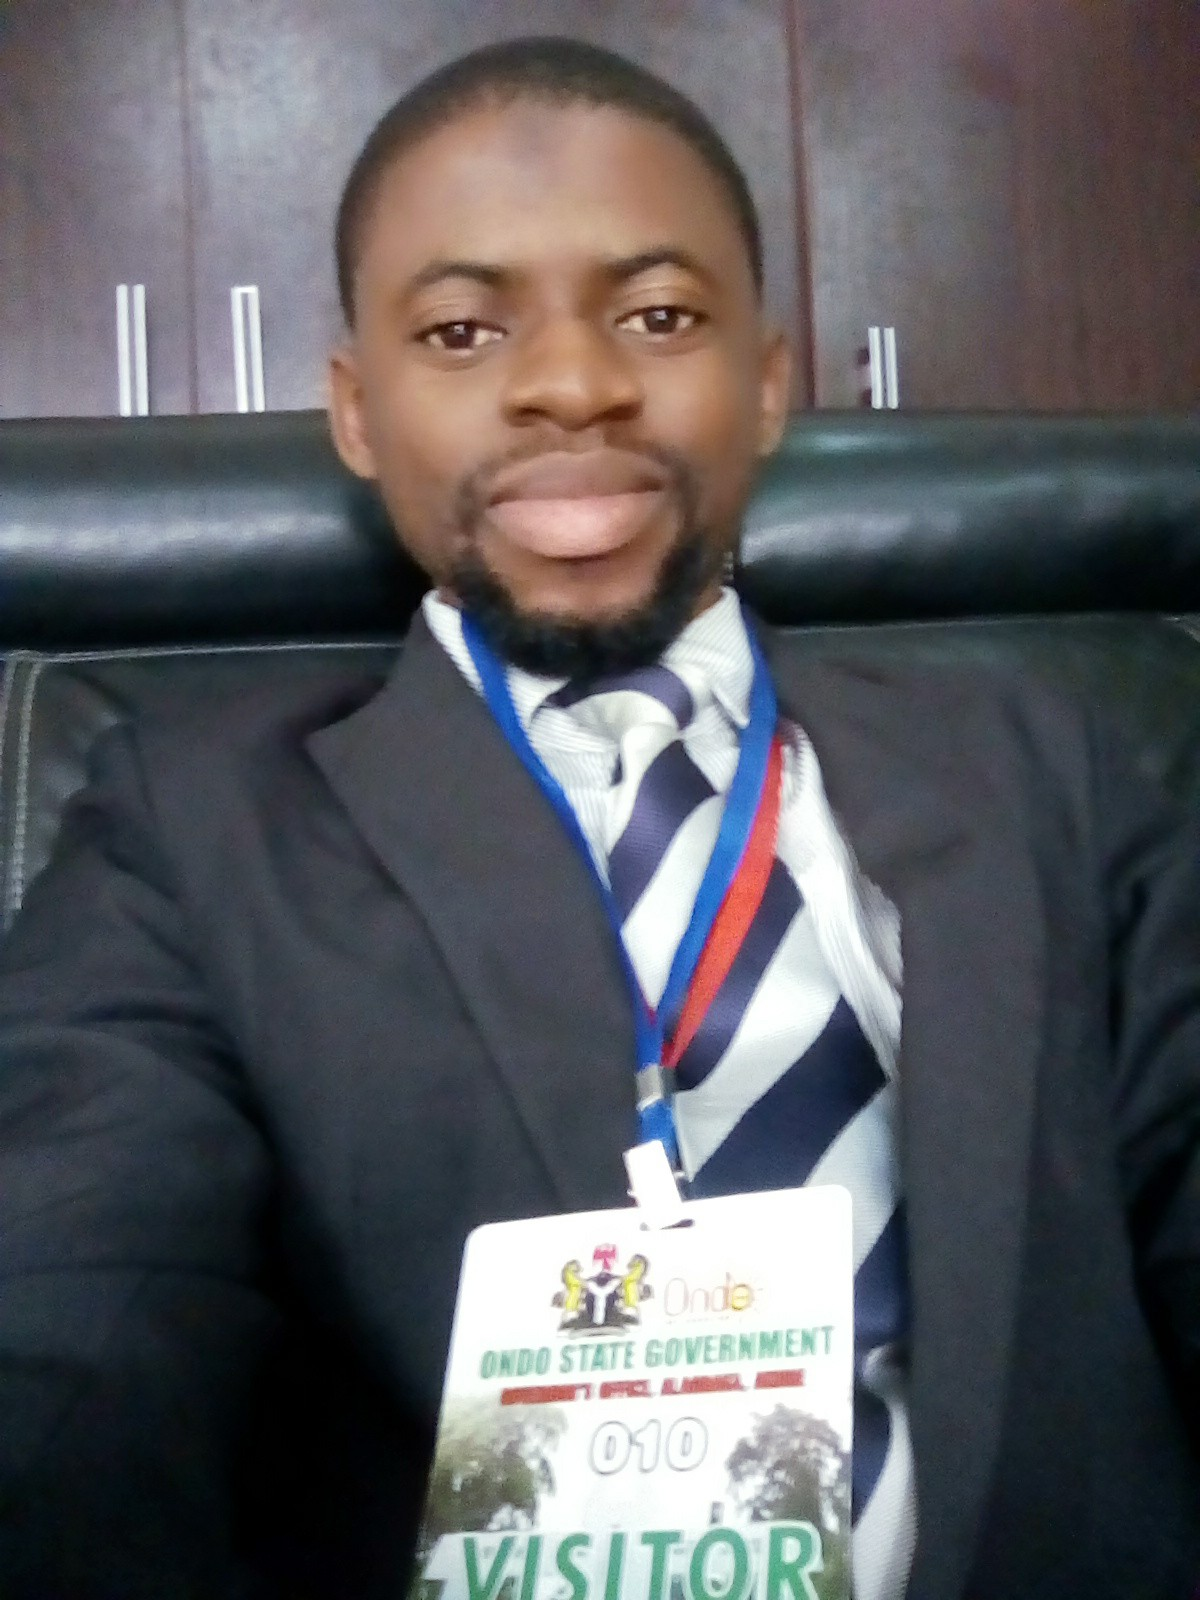